## The Objectives




The purpose of this script is to initially generate all the necessary functions for the analysis of data obtained from EBC. The following are tasked: 

1. ~Loading/Reading CSV files~
2. ~Filtering Particle ID~
3. Calibration
4. ~Generating power spectral density~
5. Extracting important statistics  
6. Fitting to PSD and extraction of values
7. A sensible method of storing all properties of the particle and trajectories associated 


In [13]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import EBC_functions as ebc
from scipy.signal import periodogram

## Loading the data

If a single file is names 'filename' and then using the following example the csv file can be read. The read_csv function automatically puts in the correct headers. 

In [ ]:
# Full file path to the csv
filename = '/home/levitech/millen2/ElectroMech/Data/20220706/20220706_refsave/EVK_20220706_13-07-33.csv'

# load CSV file
data = ebc.Read_CSV(filename)
# data['id_particle'].values[1:40] = 1

## Get particle ID 

Determining the particle is key, there are two ways in which we can do this. You can use the get_modeID function which simply finds the mode of the 'id_particle' column in the datatable. Alternatively, and more generally if you have many particles then 'get_UniqueIDs' function can collect all the unique particle IDS in the datatable with their relative counts. 

In [ ]:
# get the mode Particle ID
modeID = ebc.get_modeID(data)

# find all the unique IDs and their respective counts
uniqueIDs, counts = ebc.get_UniqueIDs(data)

## Filter out necessary particle ID

The filter_DataTable_By_ID() function essentially filters the datatable with the specified ID. that can be obtained through the get_modeID() or get_UniqueID(). 

In [ ]:
#filter the data with unique ID
# data = filter_DataTable_By_ID(data,uniqueIDs[0])

#filter the data with modeID
data = ebc.filter_DataTable_By_ID(data,modeID[0])

## Get X, Y and time

The datable table contains lots of information which is not necessary for quick analysis. We can simply get the X and Y position with time. Timestamp is properly calibrated to be in seconds. 

In [ ]:
#get the X, Y and time position from data table
X, Y ,time = ebc.getXYtime(data)

## Calibration 

The developing of calibration is critical to the all experiments. Although it is not necessary for a lot of the analysis it is nonetheless important So this section will detail its development. 

For Calibration 

## Generating the PSD

The power spectral density is an important feature and a package from scypi is used to obtain the periodogram. All that is required is the Position and sampling rate. the later is worked out using time vector with the assumption that time is synchronous (There may be examples of asynchronous time vector and will need to be dealth with elsewhere).   

In [46]:
# Generating the Periodogram for X and Y position
fs = 1/time.diff().mode()
fs = fs[0]

f, Pxx_den = periodogram(X, fs)
f, Pyy_den = periodogram(Y, fs)

## Plotting 

the most simplest of plots is the time trace 

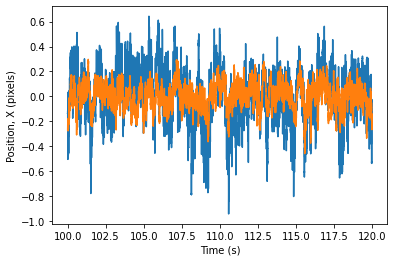

In [61]:
plt.figure()
plt.plot(time, Y-np.mean(Y))
plt.plot(time, X-np.mean(X))
# plt.legend('Y','X')
plt.xlabel('Time (s)')
plt.ylabel('Position, X (pixels)')
plt.show()

The histogram can also be easily generated from the time trace

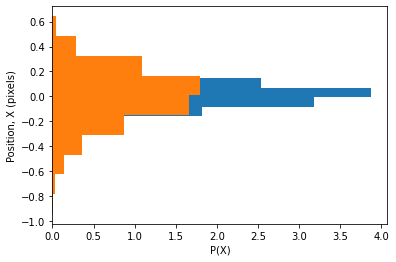

In [76]:
plt.figure()
plt.hist(X-np.mean(X), density = True, orientation="horizontal");
plt.hist(Y-np.mean(Y), density = True, orientation="horizontal");

plt.xlabel('P(X)')
plt.ylabel('Position, X (pixels)')
plt.show()

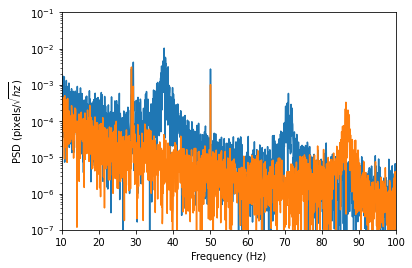

In [74]:
plt.figure()
plt.semilogy(f,Pyy_den)


plt.semilogy(f,Pxx_den)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (pixels/$\sqrt{hz}$)')
plt.xlim(10,100)
plt.ylim(1e-7, 1e-1)
plt.show()